# Kaggel Heart Failure Prediction


## Data set
    
    link - https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv
    
## ML Algorithm

    LogisticRegression

## Dataset Attribute Information

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

sns.set_theme(style='darkgrid')
warnings.filterwarnings('ignore')

In [2]:
data = (r'/home/viki/Documents/MLclass/algoritham/Dataset/heart.csv')
train_df = pd.read_csv(data)

In [3]:
train_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
train_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

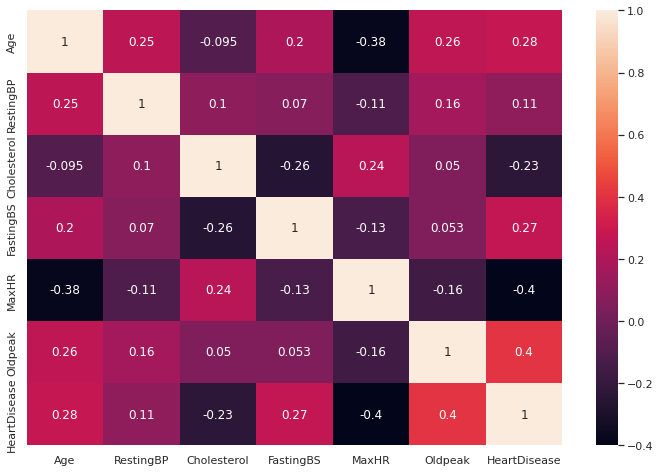

In [6]:
corr = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr, annot=True)

Text(0.5, 1.0, 'Sex Vs ChestPainType')

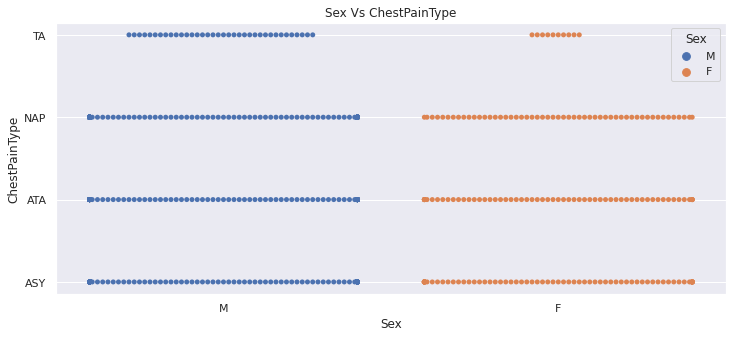

In [7]:
plt.figure(figsize=(12,5))
sns.swarmplot(x='Sex', y='ChestPainType',hue='Sex' ,data=train_df)
plt.title('Sex Vs ChestPainType')

Text(0.5, 1.0, 'No. of Live and Death')

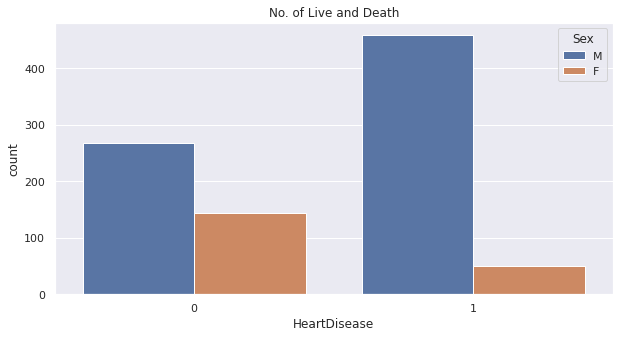

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(train_df.HeartDisease, hue=train_df.Sex)
plt.title('No. of Live and Death')

Text(0.5, 1.0, 'Age Vs MaxHR')

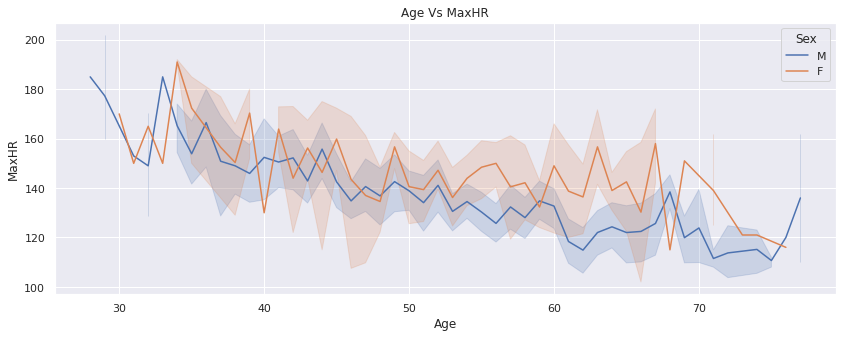

In [9]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Age', y='MaxHR', hue='Sex',data=train_df)
plt.title('Age Vs MaxHR')

In [10]:
def encode(df):
    encode_columns = list(df.select_dtypes(include=['category','object']))
    led = preprocessing.LabelEncoder()
    for columns in encode_columns:
        try:
            df[columns] = led.fit_transform(df[columns])
        except:
            print('Some Columns have null values or it not a Object dtype')
    return df

In [11]:
encode(train_df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [12]:
X = train_df.drop('HeartDisease',axis=1)
y = train_df.HeartDisease

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
LG = linear_model.LogisticRegression()

In [15]:
model = LG.fit(X_train,y_train)

In [16]:
y_pred = LG.predict(X_test)

In [17]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        74
           1       0.92      0.90      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



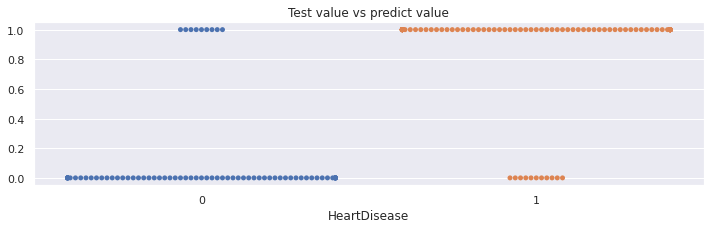

In [18]:
plt.figure(figsize=(12,3))
sns.swarmplot(x = y_test,y = y_pred)
plt.title('Test value vs predict value')
plt.show()